# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as ani
import bar_chart_race as bcr
import os
import subprocess
%matplotlib inline

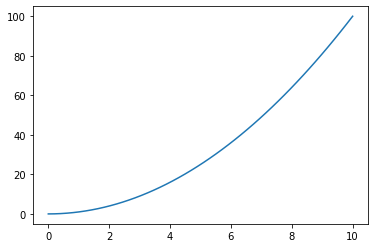

In [3]:
#Matplotlib Test
x=np.linspace(0,10)
y=x**2
plt.plot(x,y)

In [152]:
def plot_dist(df):
    plt.plot(np.array(range(1,df.shape[1]+1)), df.mean(axis=0)/df.mean(axis=0).sum())
    
def plot_dist_sum(df):
    plt.plot(np.array(range(1,df.shape[1]+1)), df.sum(axis=0))
    
def plotit(items):
    plt.figure(1)
    plt.xlabel("Cluster size")
    #plt.ylabel("Probability of atom belonging to cluster")
    plt.ylabel("Number of clusters")
    for i in items:
        s="make "+i+" -C bin"
        os.system(s)
        
        cluster_size_count=pd.read_csv("./bin/cluster_statistics.dat",header=None,index_col=None,sep=" ")
        cluster_size_count=cluster_size_count.drop(axis=1, columns=cluster_size_count.shape[1]-1)
        cluster_size_count.columns=range(1,cluster_size_count.shape[1]+1)
        no_of_molecules=cluster_size_count.shape[1]
        
        cluster_element_count=cluster_size_count.copy()
        cluster_element_count*=range(1,cluster_element_count.shape[1]+1)
        
        assert((np.array(cluster_element_count.sum(axis=1))==np.ones(len(cluster_element_count.index))*no_of_molecules).all()), "Sum of molecules not consistent"
        plot_dist(cluster_size_count)
    plt.legend(items)
    plt.show()

def plotit2(items2):
    plt.figure(1)
    plt.xlabel("Cluster size")
    #plt.ylabel("Probability of atom belonging to cluster")
    plt.ylabel("Number of clusters")
    for i in items2:
        s="BS"+i+"_stat.dat"
        cluster_size_count=pd.read_csv("./bin/"+s,header=None,index_col=None,sep=" ")
        cluster_size_count=cluster_size_count.drop(axis=1, columns=cluster_size_count.shape[1]-1)
        cluster_size_count.columns=range(1,cluster_size_count.shape[1]+1)
        no_of_molecules=cluster_size_count.shape[1]
        
        cluster_element_count=cluster_size_count.copy()
        cluster_element_count*=range(1,cluster_element_count.shape[1]+1)
        
        assert((np.array(cluster_element_count.sum(axis=1))==np.ones(len(cluster_element_count.index))*no_of_molecules).all()), "Sum of molecules not consistent"
        plot_dist(cluster_size_count)
    plt.legend(items)
    plt.show()
    

items=["bsh","bs1","bs2","bs3","bs4"]
items1=["H","1","2","3","4"]
#plotit(items)
plotit2(items1)

In [110]:
os.system("make bs4 -C bin")

make: Entering directory '/home/avinash/Projects/KDP_Clustering/bin'
./test -f ../ExampleData/M1B_S4_avi.xtc -t ../ExampleData/run1664.top -o ../ExampleData/M1B_S4_out.pdb -m 10
Conf:     0 | MaxClusterSize:  1337 | %age Clustered: 90.56 | %age Strong : 73.17 | Cluster Charge : -198
Conf:    10 | MaxClusterSize:  1315 | %age Clustered: 91.41 | %age Strong : 71.20 | Cluster Charge : -188
Conf:    20 | MaxClusterSize:  1329 | %age Clustered: 92.01 | %age Strong : 71.36 | Cluster Charge : -163
Conf:    30 | MaxClusterSize:  1340 | %age Clustered: 90.62 | %age Strong : 70.81 | Cluster Charge : -188
Conf:    40 | MaxClusterSize:  1307 | %age Clustered: 90.62 | %age Strong : 70.70 | Cluster Charge : -198
Conf:    50 | MaxClusterSize:  1329 | %age Clustered: 91.83 | %age Strong : 72.30 | Cluster Charge : -217
Conf:    60 | MaxClusterSize:  1316 | %age Clustered: 90.62 | %age Strong : 69.97 | Cluster Charge : -176
Conf:    70 | MaxClusterSize:  1306 | %age Clustered: 91.95 | %age Strong : 72.1

0

In [111]:
cluster_size_count=pd.read_csv("./bin/cluster_statistics.dat",header=None,index_col=None,sep=" ")
cluster_size_count=cluster_size_count.drop(axis=1, columns=cluster_size_count.shape[1]-1)
cluster_size_count.columns=range(1,cluster_size_count.shape[1]+1)
no_of_molecules=cluster_size_count.shape[1]

In [112]:
cluster_size_count

,1,2,3,4,5,6,7,8,9,10,...,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664
0,157,36,8,4,4,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,156,35,12,9,3,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,157,29,14,6,1,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,155,35,5,5,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,140,44,11,6,2,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,162,27,17,5,2,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,163,36,18,4,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
198,155,33,14,7,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,164,37,13,6,2,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
cluster_element_count=cluster_size_count.copy()
cluster_element_count*=range(1,cluster_element_count.shape[1]+1)

In [114]:
cluster_element_count

,1,2,3,4,5,6,7,8,9,10,...,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664
0,157,72,24,16,20,12,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
1,156,70,36,36,15,6,7,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,157,58,42,24,5,0,0,0,27,0,...,0,0,0,0,0,0,0,0,0,0
3,155,70,15,20,10,6,7,8,0,0,...,0,0,0,0,0,0,0,0,0,0
4,140,88,33,24,10,12,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,162,54,51,20,10,12,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,163,72,54,16,0,12,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
198,155,66,42,28,10,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,164,74,39,24,10,12,7,8,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
#Checks if the sum of all ions in teh clusters is the number of molecules #Sanity Check
assert((np.array(cluster_element_count.sum(axis=1))==np.ones(len(cluster_element_count.index))*no_of_molecules).all()), "Sum of molecules not consistent"

In [134]:
def plot_dist(df):
    plt.plot(np.array(range(1,df.shape[1]+1))/df.shape[1], df.mean(axis=0)/df.shape[1])
#plt.plot(range(1,cluster_element_count.shape[1]+1), cluster_element_count.mean(axis=0))
plot_dist(cluster_element_count)
plt.show()

In [142]:
cluster_element_count.mean(axis=0).sum()

1664.0

In [12]:
os.system("make clean -C bin")

make: Entering directory '/home/avinash/Projects/KDP_Clustering/bin'
rm -f ./obj/*.o *~ core /*~ 
rm -f gmon.out perf_analysis.txt
rm -f test
rm -f ../ExampleData/test_out.pdb
rm -f cluster_max_size.dat
rm -f cluster_statistics.dat
rm -f ring_statistics.dat
rm -f Kstatistics.dat
make: Leaving directory '/home/avinash/Projects/KDP_Clustering/bin'


0

In [34]:
bar_graph_df=cluster_element_count.copy()
bar_graph_df.loc[:,no_of_molecules//10+1]=bar_graph_df.loc[:,no_of_molecules//10+1:no_of_molecules].sum(axis=1)
bar_graph_df.drop(bar_graph_df.loc[:,no_of_molecules//10+2:no_of_molecules],axis=1,inplace=True)
bar_graph_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,29,20,9,8,10,6,0,0,0,0,0,0,0,0,0,74
1,24,10,24,4,10,6,14,0,0,0,0,0,0,0,0,64
2,25,12,21,8,15,6,7,0,9,0,0,0,0,14,0,39
3,33,16,12,8,10,6,0,8,0,0,0,0,0,0,0,63
4,26,8,24,8,5,12,7,0,0,0,0,12,13,0,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,23,8,15,16,15,0,0,8,0,0,0,0,0,0,0,71
997,24,8,15,20,0,0,7,0,0,10,0,0,0,0,0,72
998,20,18,18,8,5,6,0,8,0,0,0,0,0,0,0,73
999,21,12,15,12,15,0,7,8,0,0,0,0,26,0,0,40


In [35]:
fig=plt.figure()
plt.ylabel('No of molecules')
plt.xlabel('Cluster Size')
plt.xticks(bar_graph_df.columns)
#plt.yticks(bar_graph_df.columns)
plt.bar(bar_graph_df.columns,bar_graph_df.loc[0,:])

<BarContainer object of 16 artists>

In [19]:
fig = plt.figure()
bar = ''
def buildmebarchart(i=int):
    fig.clf()
    iv = min(i, len(bar_graph_df.index)-1) #the loop iterates an extra one time, which causes the dataframes to go out of bounds. This was the easiest (most lazy) way to solve this :)
    objects = bar_graph_df.max().index
    y_pos = np.arange(len(objects))
    performance = bar_graph_df.iloc[[iv]].values.tolist()[0]
    plt.bar(y_pos, performance)
    plt.xticks(y_pos, objects)
    plt.ylim(0,no_of_molecules)
    plt.ylabel('No of K molecules')
    plt.xlabel('No of HPO molecules assoiated with K molecules')
    plt.title('Configuration \n' + str(bar_graph_df.index[iv]))

animator = ani.FuncAnimation(fig, buildmebarchart, interval=1)
#writervideo = ani.FFMpegWriter(fps=60)
#ani.save('NoOfMoleculesVSClusterSizeBarGraph.gif', writer=writervideo)
plt.show()

# Kstats

In [3]:
Kstats=pd.read_csv("./bin/Kstatistics.dat",header=None,index_col=None,sep=" ")
Kstats=Kstats.drop(axis=1, columns=Kstats.shape[1]-1)
#cluster_size_count.columns=range(1,cluster_size_count.shape[1]+1)
no_of_molecules=Kstats.shape[1]
#Kstats.shape[1]
Kstats

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,52,46,37,14,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,46,58,26,20,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47,54,34,16,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45,58,31,20,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52,56,33,12,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,40,52,40,18,5,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,43,48,43,13,7,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,44,52,38,13,7,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999,41,54,37,17,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Kstats.mean(axis=0)[0:10]

0    45.259740
1    49.282717
2    35.345654
3    18.957043
4     6.996004
5     1.143856
6     0.014985
7     0.000000
8     0.000000
9     0.000000
dtype: float64

In [4]:
bar_graph_df=Kstats.copy()
bar_graph_df.drop(bar_graph_df.loc[:,10:no_of_molecules],axis=1,inplace=True)
bar_graph_df

,0,1,2,3,4,5,6,7,8,9
0,52,46,37,14,4,4,0,0,0,0
1,46,58,26,20,6,1,0,0,0,0
2,47,54,34,16,5,1,0,0,0,0
3,45,58,31,20,3,0,0,0,0,0
4,52,56,33,12,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
996,40,52,40,18,5,2,0,0,0,0
997,43,48,43,13,7,3,0,0,0,0
998,44,52,38,13,7,3,0,0,0,0
999,41,54,37,17,4,4,0,0,0,0


In [8]:
fig = plt.figure()
bar = ''
def buildmebarchart(i=int):
    fig.clf()
    iv = min(i, len(bar_graph_df.index)-1) #the loop iterates an extra one time, which causes the dataframes to go out of bounds. This was the easiest (most lazy) way to solve this :)
    objects = bar_graph_df.max().index
    y_pos = np.arange(len(objects))
    performance = bar_graph_df.iloc[[iv]].values.tolist()[0]
    plt.bar(y_pos, performance)
    plt.xticks(y_pos, objects)
    plt.ylim(0,no_of_molecules)
    plt.ylabel('No of K molecules')
    plt.xlabel('No of HPO neighbours')
    plt.title('Configuration \n' + str(bar_graph_df.index[iv]))

animator = ani.FuncAnimation(fig, buildmebarchart, interval=1,frames=1001)
writervideo = ani.FFMpegWriter(fps=60)
animator.save('NoOf_K_Molecules_VS_HPO_Neighbour_CountBarGraph.gif', writer=writervideo)
#plt.show()

In [9]:
Kstats

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,52,46,37,14,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,46,58,26,20,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47,54,34,16,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45,58,31,20,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52,56,33,12,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,40,52,40,18,5,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,43,48,43,13,7,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,44,52,38,13,7,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999,41,54,37,17,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
window=100
kstats_rolling = Kstats.rolling(window).mean()
kstats_rolling = kstats_rolling[(window-1):]
kstats_rolling

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
99,46.41,47.97,36.03,19.32,6.74,0.53,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,46.31,48.01,35.90,19.47,6.82,0.49,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,46.21,47.98,35.94,19.52,6.87,0.48,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,46.08,47.96,35.97,19.58,6.92,0.49,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,46.02,47.84,36.01,19.65,6.98,0.50,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,45.57,47.29,36.13,19.03,7.70,1.26,0.02,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,45.59,47.22,36.16,19.01,7.71,1.29,0.02,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,45.49,47.30,36.17,18.99,7.71,1.32,0.02,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,45.42,47.31,36.23,18.98,7.68,1.36,0.02,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
bar_graph_df=kstats_rolling.copy()
bar_graph_df.drop(bar_graph_df.loc[:,10:no_of_molecules],axis=1,inplace=True)
bar_graph_df

,0,1,2,3,4,5,6,7,8,9
99,46.41,47.97,36.03,19.32,6.74,0.53,0.00,0.0,0.0,0.0
100,46.31,48.01,35.90,19.47,6.82,0.49,0.00,0.0,0.0,0.0
101,46.21,47.98,35.94,19.52,6.87,0.48,0.00,0.0,0.0,0.0
102,46.08,47.96,35.97,19.58,6.92,0.49,0.00,0.0,0.0,0.0
103,46.02,47.84,36.01,19.65,6.98,0.50,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
996,45.57,47.29,36.13,19.03,7.70,1.26,0.02,0.0,0.0,0.0
997,45.59,47.22,36.16,19.01,7.71,1.29,0.02,0.0,0.0,0.0
998,45.49,47.30,36.17,18.99,7.71,1.32,0.02,0.0,0.0,0.0
999,45.42,47.31,36.23,18.98,7.68,1.36,0.02,0.0,0.0,0.0


In [22]:
fig = plt.figure()
bar = ''
def buildmebarchart(i=int):
    fig.clf()
    iv = min(i, len(bar_graph_df.index)-1) #the loop iterates an extra one time, which causes the dataframes to go out of bounds. This was the easiest (most lazy) way to solve this :)
    objects = bar_graph_df.max().index
    y_pos = np.arange(len(objects))
    performance = bar_graph_df.iloc[[iv]].values.tolist()[0]
    plt.bar(y_pos, performance)
    plt.xticks(y_pos, objects)
    plt.ylim(0,no_of_molecules)
    plt.ylabel('No of K molecules')
    plt.xlabel('No of HPO neighbours')
    plt.title('Configuration \n' + str(bar_graph_df.index[iv]))

animator = ani.FuncAnimation(fig, buildmebarchart, interval=1,frames=1001)
writervideo = ani.FFMpegWriter(fps=60)
animator.save('NoOf_K_Molecules_VS_HPO_Neighbour_CountBarGraph_100.gif', writer=writervideo)
#plt.show()